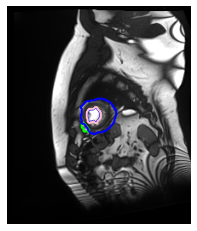

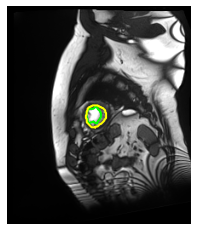

'Plot Segmentation'

In [29]:
# visualization of segmentation results
import os
import h5py
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt


def pseudo_label_generator_acdc(data, seed, beta=100, mode='bf'):
    from skimage.exposure import rescale_intensity
    from skimage.segmentation import random_walker
    if 1 not in np.unique(seed) or 2 not in np.unique(seed) or 3 not in np.unique(seed):
        pseudo_label = np.zeros_like(seed)
    else:
        markers = np.ones_like(seed)
        markers[seed == 4] = 0
        markers[seed == 0] = 1
        markers[seed == 1] = 2
        markers[seed == 2] = 3
        markers[seed == 3] = 4
        sigma = 0.35
        data = rescale_intensity(data, in_range=(-sigma, 1 + sigma),
                                 out_range=(-1, 1))
        segmentation = random_walker(data, markers, beta, mode)
        pseudo_label =  segmentation - 1
    return pseudo_label


def show_segmentation_resuts(image, segmentation, class_num=3, saved_path=None):
    color_maps = ['lime', "blue", "pink"]
    for cls in range(1, class_num+1):
        contours1 = measure.find_contours(segmentation==cls, 0.2)
        for n, contour in enumerate(contours1):
            plt.plot(contour[:, 1], contour[:, 0], color_maps[cls-1], linewidth=2)
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    if saved_path is not None:
        plt.savefig(saved_path,bbox_inches='tight',dpi=500,pad_inches=0.0)
    else:
        pass
    plt.show()
    return "Plot Segmentation"


def visulization_comparison_between_prediction_label(image, prediction, label, saved_path=None):
    color_maps = ['lime', "yellow"]
    
    contours_pred = measure.find_contours(prediction, 0.1)
    contours_lab = measure.find_contours(label, 0.1)
    
    for n, contour1 in enumerate(contours_pred):
        plt.plot(contour1[:, 1], contour1[:, 0], color_maps[0], linewidth=2)
    
    for n, contour2 in enumerate(contours_lab):
        plt.plot(contour2[:, 1], contour2[:, 0], color_maps[1], linewidth=2)
        
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    if saved_path is not None:
        plt.savefig(saved_path,bbox_inches='tight',dpi=500,pad_inches=0.0)
    else:
        pass
    plt.show()
    return "Plot Segmentation"

h5f = h5py.File("data/patient001_frame01_slice_9.h5", "r")
img = h5f["image"][:]
lab = h5f["label"][:]

pred = pseudo_label_generator_acdc(img, h5f["scribble"][:])
show_segmentation_resuts(img, pred)
visulization_comparison_between_prediction_label(img, pred==3, lab==3)

In [35]:
# paired sample t-test
import scipy.stats as stats  

a = np.random.random((10)) * 0.3
b = np.random.random((10)) * 0.2 + np.random.random((1))
print(a,b)
r, p = stats.ttest_rel(a, b) # a and b mean evaluation result lists between two methods, respectively.
print(r, p)


[0.06952333 0.03583237 0.13395062 0.08523619 0.05311825 0.08408225
 0.22781783 0.11135866 0.12534416 0.14123925] [0.33389486 0.31414232 0.19011732 0.28984892 0.15380223 0.32631179
 0.26124675 0.19809435 0.15882994 0.15058315]
-3.9362478852510177 0.0034254057327246993


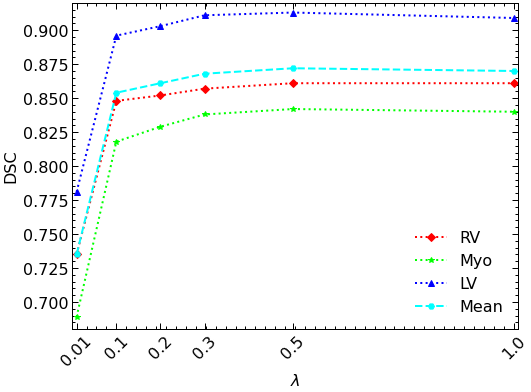

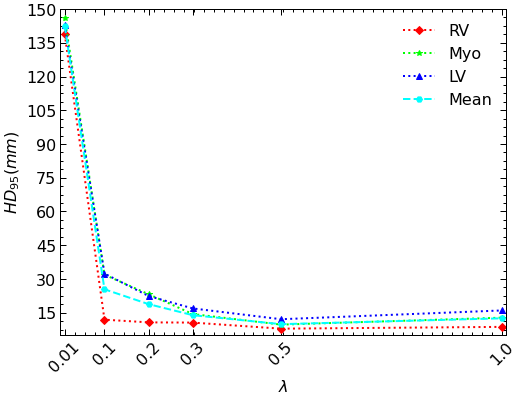

<Figure size 576x432 with 0 Axes>

In [1]:
# plot evolution curve
# please install the SciencePlots by run this line "pip install SciencePlots"

from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

x_index = [0.01, 0.1, 0.2, 0.3, 0.5, 1.0]
rv_dice_mean_list = [0.735, 0.848, 0.852, 0.857, 0.861, 0.861]
myo_dice_mean_list = [0.689, 0.818, 0.829, 0.838, 0.842, 0.84]
lv_dice_mean_list = [0.781, 0.896, 0.903, 0.911, 0.913, 0.909]
all_dice_mean_list = [0.735, 0.854, 0.861, 0.868, 0.872, 0.87]

rv_hd95_mean_list = [138.8, 11.9, 10.7, 10.6, 7.9,8.7]
myo_hd95_mean_list = [145.8, 31.9, 23.2, 14.4, 9.7, 12.8]
lv_hd95_mean_list = [142.9, 32.4, 22.4, 16.9, 12.1, 16.0]
all_hd95_mean_list = [142.5, 25.4, 18.8, 13.9, 9.9,12.5]


params={'font.family':'serif',
        'font.serif':'Times New Roman',
        'font.style':'normal',
        'font.weight':'normal', #or 'blod'
        'font.size':18,#or large,small
        }
rcParams.update(params)

with plt.style.context(['science', 'notebook']):
#     plt.figure()
    fig, ax = plt.subplots()
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.plot(x_index, rv_dice_mean_list, ":", label = 'RV', marker = 'D', color="red")
    plt.plot(x_index, myo_dice_mean_list, ":",label = 'Myo', marker = '*', color="lime")
    plt.plot(x_index, lv_dice_mean_list, ":",label = 'LV', marker = '^', color="blue")
    plt.plot(x_index, all_dice_mean_list, "--",label = 'Mean', marker = 'H', color="cyan")
    plt.xlabel("$\lambda$")
    plt.ylabel("DSC")
    plt.ylim(0.68, 0.92)
    plt.xlim(-0.001, 1.01)
#     plt.legend([y, y1, y2], ['1', '2', '8'], loc='upper left')
    plt.legend(loc='best')
    plt.xticks(x_index, ["0.01", "0.1", "0.2", "0.3", "0.5", "1.0"], rotation=45)
    plt.savefig("data/dice.svg", dpi=800)

    plt.show()


with plt.style.context(['science', 'notebook']):
#     plt.figure()
    fig, ax = plt.subplots()
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.plot(x_index, rv_hd95_mean_list, ":", label = 'RV', marker = 'D', color="red")
    plt.plot(x_index, myo_hd95_mean_list, ":",label = 'Myo', marker = '*', color="lime")
    plt.plot(x_index, lv_hd95_mean_list, ":",label = 'LV', marker = '^', color="blue")
    plt.plot(x_index, all_hd95_mean_list, "--",label = 'Mean', marker = 'H', color="cyan")
    plt.xlabel("$\lambda$")
    plt.ylabel("$HD_{95}(mm)$")
    plt.ylim(5, 150)
    plt.xlim(-0.001, 1.01)
    plt.legend(loc='best')
    plt.xticks(x_index, ["0.01", "0.1", "0.2", "0.3", "0.5", "1.0"], rotation=45)
    plt.savefig("data/hd95.svg", dpi=800)
    plt.show()

    plt.savefig("npc-plot-ratio.svg", dpi=800)
    
# with plt.style.context(['science', "notebook"]):
#     fig, ax = plt.subplots()
#     for ind, p in enumerate(x):
#         ax.plot(x, y[ind], label=p)`
#     ax.legend(title='Order')
#     ax.set(xlabel='Voltage (mV)')
#     ax.set(ylabel='Current ($\mu$A)')
#     ax.autoscale(tight=True)


In [ ]:
import numpy as np

def False_Positive_Negative_Dice(result, reference):
    """
    FPD: False-Positive Dice;
    FND: False-Negative Dice;
    The FND and FPD are good metrics that help quantify potential near misses and overtreatment, respectively.
    Reference: https://doi.org/10.1016/j.ijrobp.2020.10.005
    """
    fn = np.count_nonzero(~result & reference)
    fp = np.count_nonzero(result & ~reference)
    tp = np.count_nonzero(result & reference)
    tn = np.count_nonzero(~result & ~reference)
    fpd = 2 * fp / float(2 * tp + fn + fp)
    fnd = 2 * fn / float(2 * tp + fn + fp)
    return fpd, fnd